In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix
from math import sqrt
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier, ExtraTreesClassifier, VotingClassifier,
    StackingClassifier, AdaBoostClassifier
)
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Load Dataset 

In [46]:
df = pd.read_csv('/kaggle/input/advertisingcsv/Advertising.csv')

In [47]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [48]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# EDA

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [50]:
# Get the shape of the dataset (rows, columns)
df.shape

(200, 5)

In [51]:
# Get the column names of the dataset
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [52]:
df = df.drop('Unnamed: 0', axis=1)

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [54]:
#checking for missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Visualization

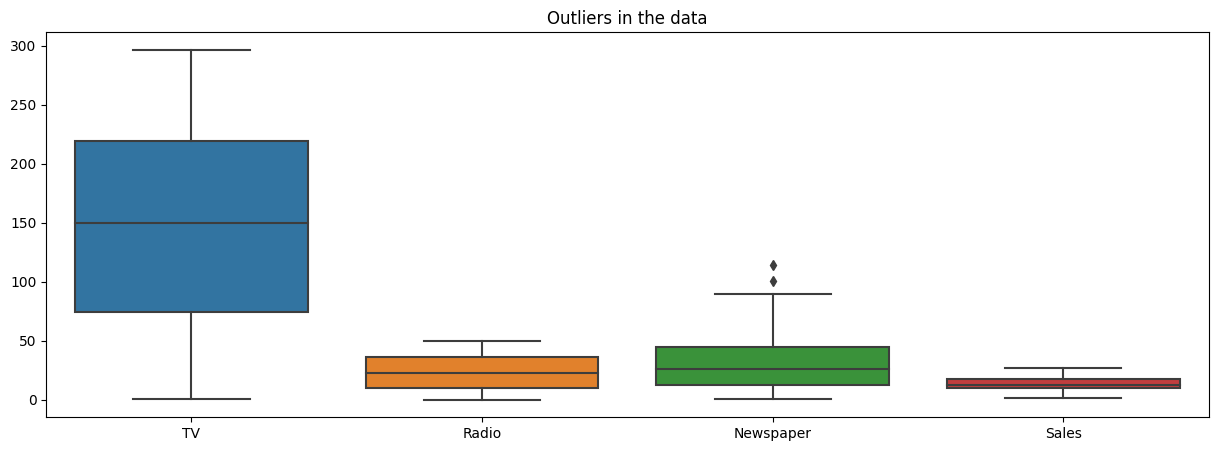

In [55]:
#check for outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=df)
plt.title("Outliers in the data")
plt.show()

In [56]:
#Detect and remove outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [57]:
# Filtering out the outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,198.0,146.688384,85.443221,0.7,74.800,149.75,218.475,293.6
Radio,198.0,23.130808,14.862111,0.0,9.925,22.40,36.325,49.6
Newspaper,198.0,29.777273,20.446303,0.3,12.650,25.60,44.050,89.4
Sales,198.0,13.980808,5.196097,1.6,10.325,12.90,17.375,27.0


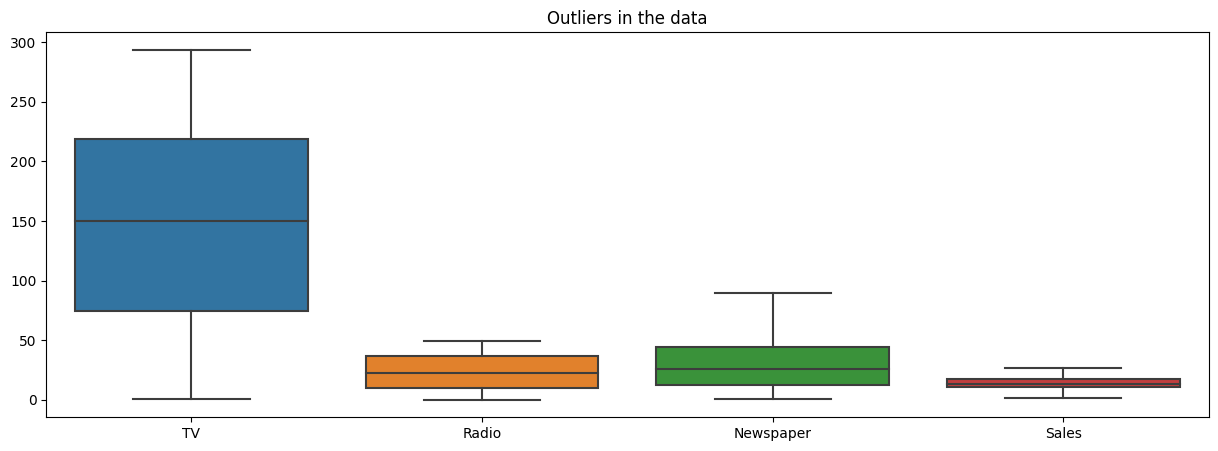

In [58]:
#check for outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=df)
plt.title("Outliers in the data")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

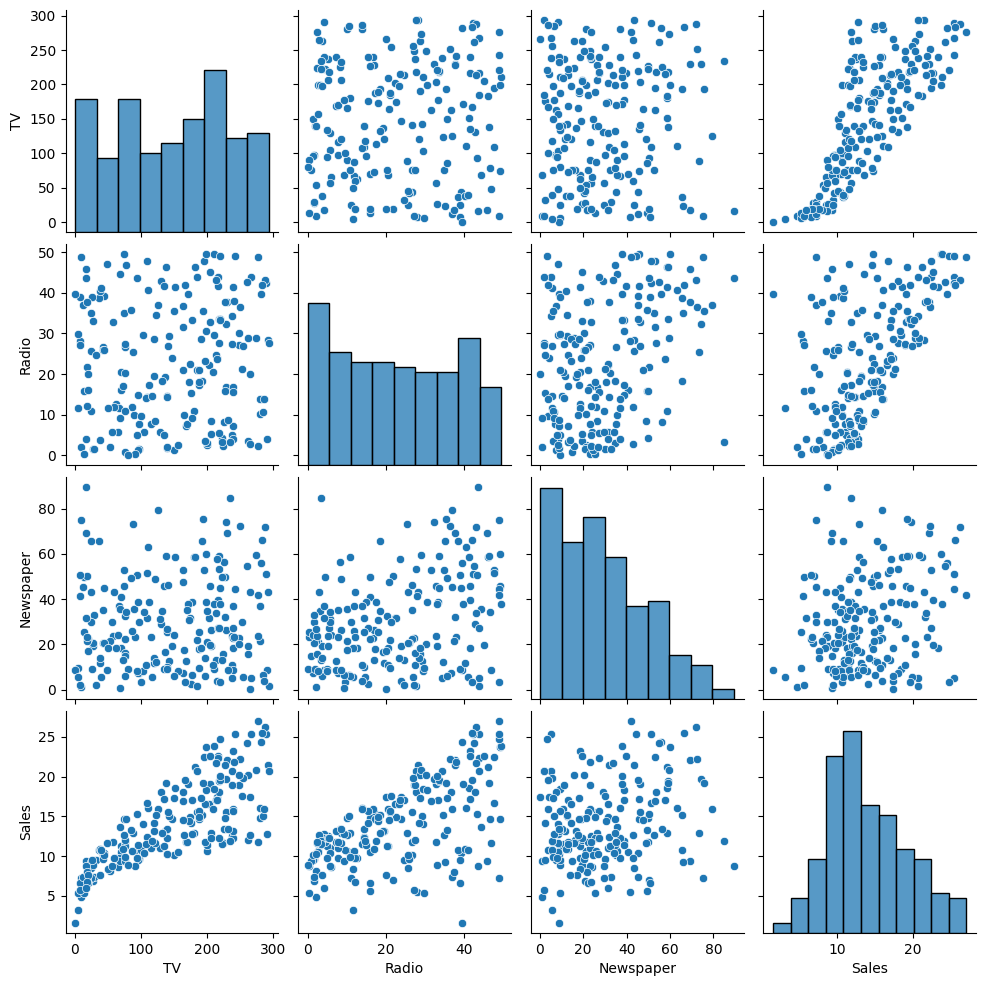

In [59]:
sns.pairplot(df)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


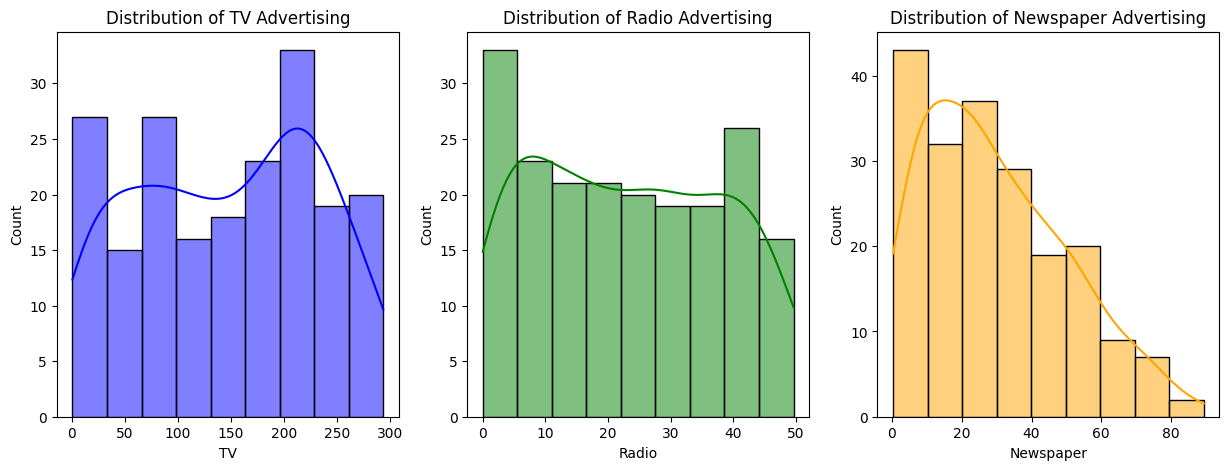

In [60]:
# Plot histograms for independent variables
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['TV'], kde=True, color='blue')
plt.title('Distribution of TV Advertising')

plt.subplot(1, 3, 2)
sns.histplot(df['Radio'], kde=True, color='green')
plt.title('Distribution of Radio Advertising')

plt.subplot(1, 3, 3)
sns.histplot(df['Newspaper'], kde=True, color='orange')
plt.title('Distribution of Newspaper Advertising')

plt.show()


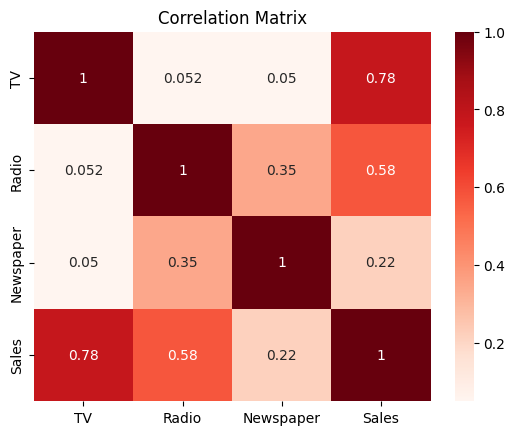

In [61]:
# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()

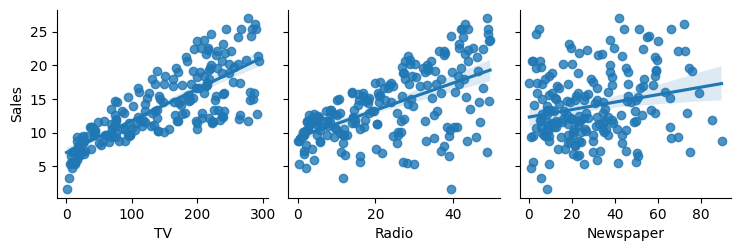

In [62]:
# Scatter plots to check the linearity assumption between each independent variable (TV, Radio, Newspaper) and the dependent variable (Sales)
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")

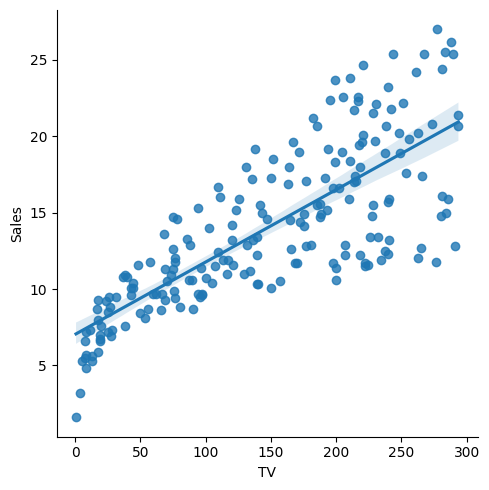

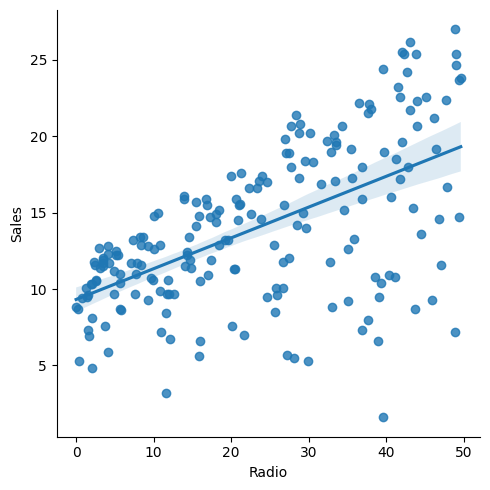

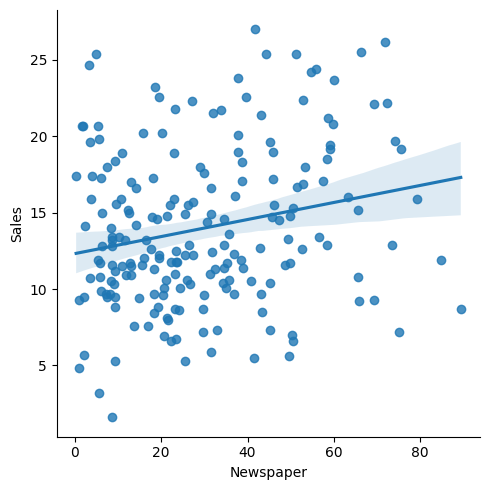

In [19]:
# Linear regression plots to visualize the relationship between each independent variable and the dependent variable
sns.lmplot(x='TV', y='Sales', data=df)
sns.lmplot(x='Radio', y='Sales', data=df)
sns.lmplot(x='Newspaper', y='Sales', data=df)

# ML Models

In [63]:
# Define features and target variable
x = df.drop(columns=['Sales'])
y = df['Sales']

In [65]:
# Splitting into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)

In [66]:
# Defining the models needed for the predictions
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

In [67]:
# Models training and evaluation metrics
def train_and_evaluate(models, x_train, x_test, y_train, y_test):
    results = []
    predictions = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        predictions[name] = y_pred
        mse = mean_squared_error(y_test, y_pred)
        rmse = sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append([name, mse, rmse, mae, r2])
    return results, predictions

In [68]:
# Running the evaluation
results, predictions = train_and_evaluate(models, x_train, x_test, y_train, y_test)

In [69]:
# Create a tabular representation of results
table = tabulate(results, headers=['The Models', 'MSE', 'RMSE', 'MAE', 'R2'], tablefmt='grid')
print(table)

+-------------------+----------+----------+----------+----------+
| The Models        |      MSE |     RMSE |      MAE |       R2 |
+===================+==========+==========+==========+==========+
| Linear Regression | 2.84304  | 1.68613  | 1.26154  | 0.908348 |
+-------------------+----------+----------+----------+----------+
| SVR               | 5.86163  | 2.42108  | 1.6222   | 0.811037 |
+-------------------+----------+----------+----------+----------+
| Gradient Boosting | 0.451739 | 0.672115 | 0.521855 | 0.985437 |
+-------------------+----------+----------+----------+----------+
| Random Forest     | 0.711134 | 0.843288 | 0.6977   | 0.977075 |
+-------------------+----------+----------+----------+----------+
| XGBoost           | 0.579168 | 0.761031 | 0.607629 | 0.981329 |
+-------------------+----------+----------+----------+----------+


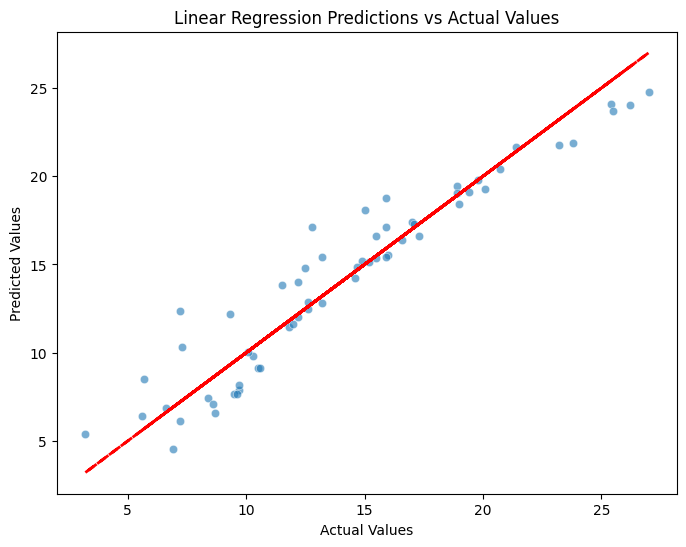

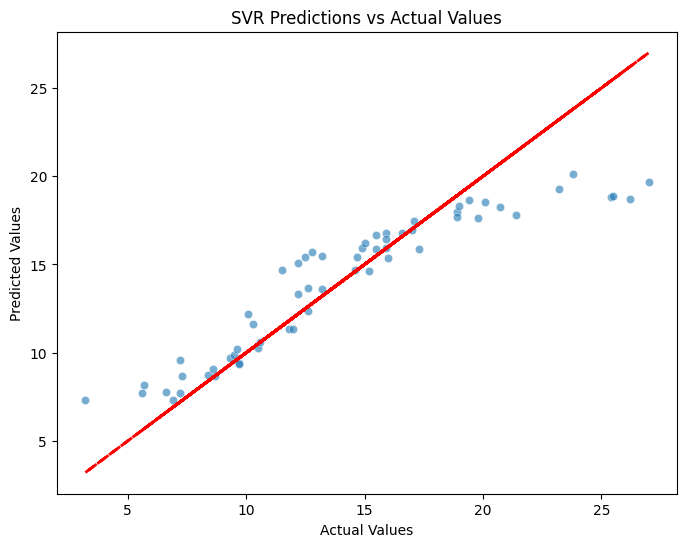

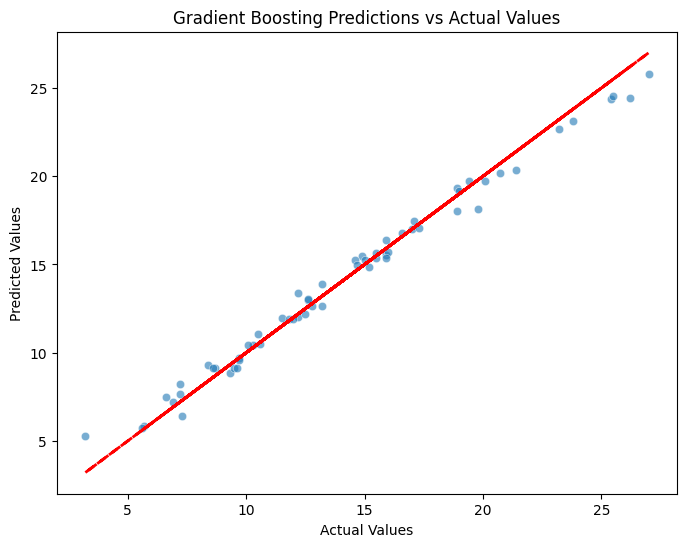

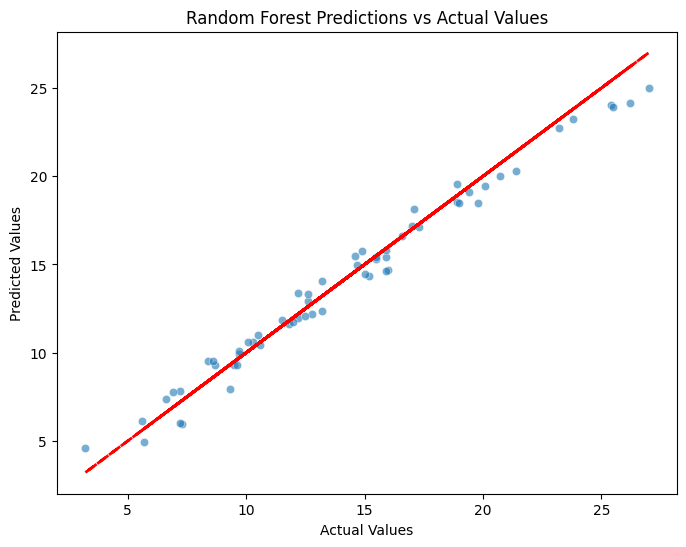

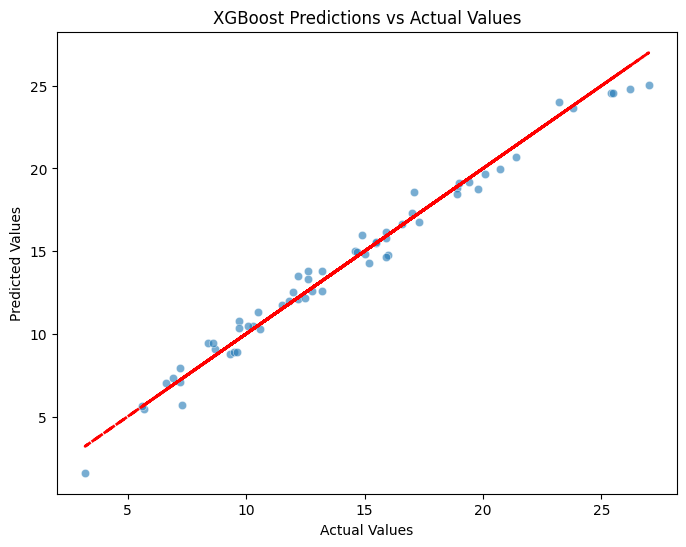

In [70]:
# Visualizing predictions in new tabs
def visualize_predictions(y_test, predictions):
    for name, y_pred in predictions.items():
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
        plt.plot(y_test, y_test, color='red', linestyle='dashed', linewidth=2)  # Ideal predictions line
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'{name} Predictions vs Actual Values')
        plt.show()

visualize_predictions(y_test, predictions)